started!
(97, 200, 200, 3)
(42, 200, 200, 3)
(97,)
(42,)
Epoch 1/20
4/4 [==============================] - 2s 346ms/step - loss: 2.4023 - accuracy: 0.5167 - val_loss: 0.7144 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 1s 293ms/step - loss: 0.7013 - accuracy: 0.5052 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 1s 295ms/step - loss: 0.6935 - accuracy: 0.4739 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 1s 293ms/step - loss: 0.6971 - accuracy: 0.5052 - val_loss: 0.7071 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 1s 292ms/step - loss: 0.7055 - accuracy: 0.5073 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 1s 293ms/step - loss: 0.6898 - accuracy: 0.5042 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 1s 290ms/step - loss: 0.6937 - accuracy: 0.4979 - val

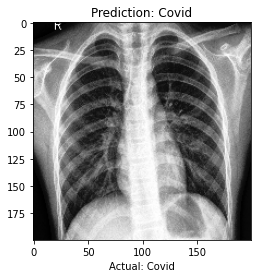

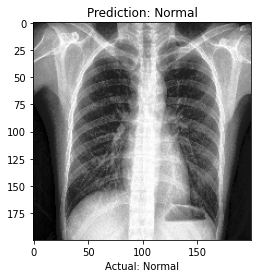

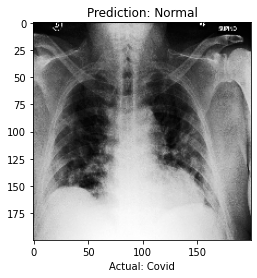

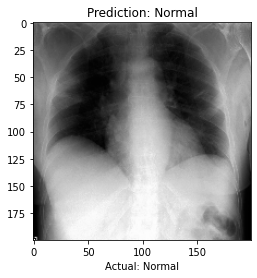

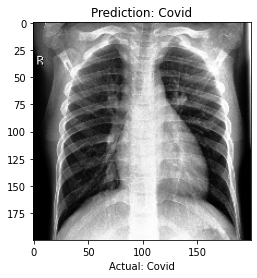

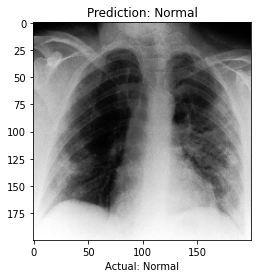

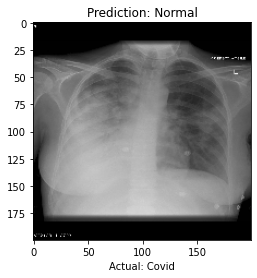

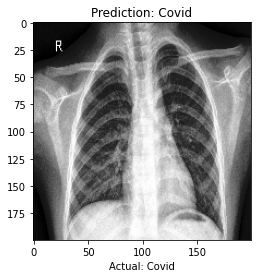

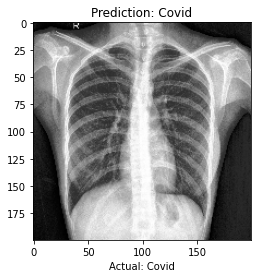

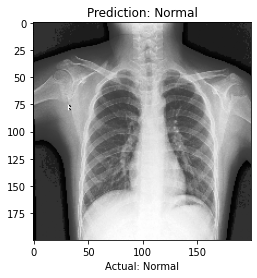

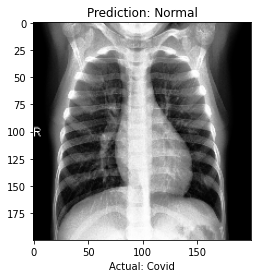

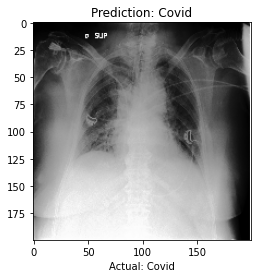

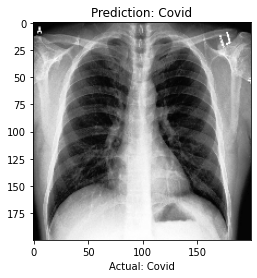

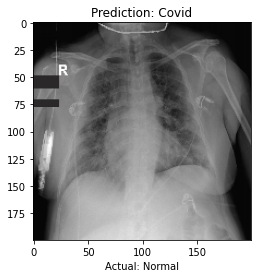

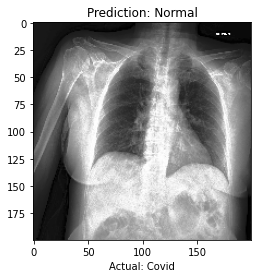

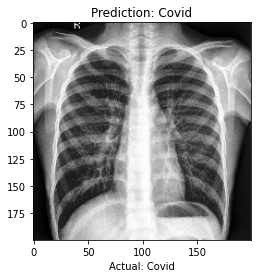

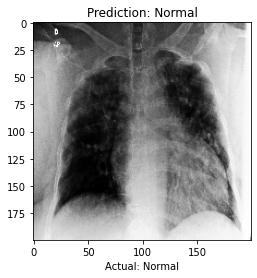

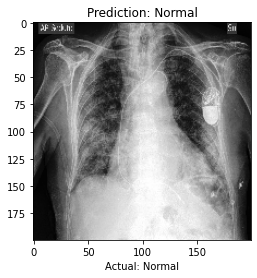

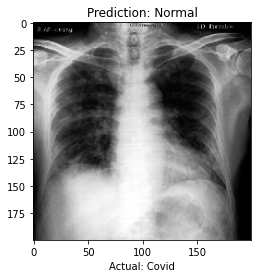

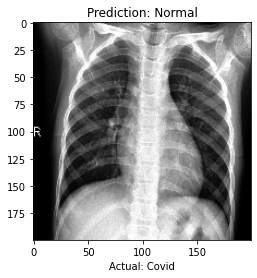

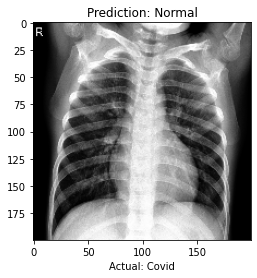

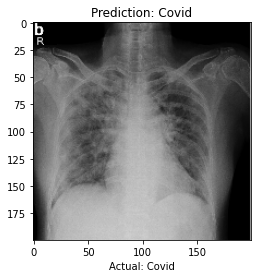

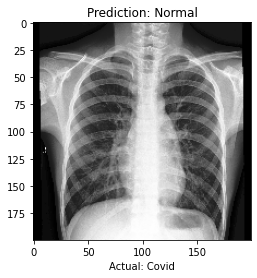

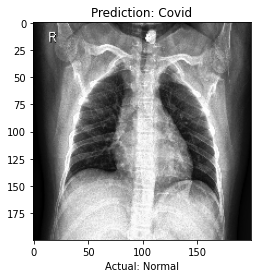

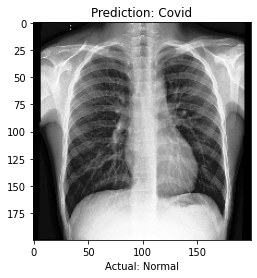

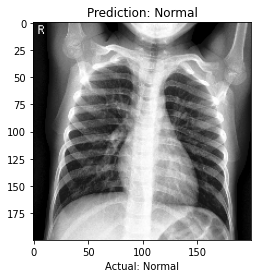

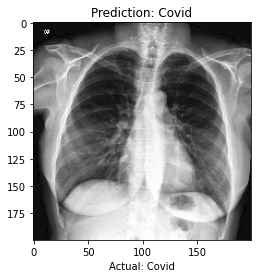

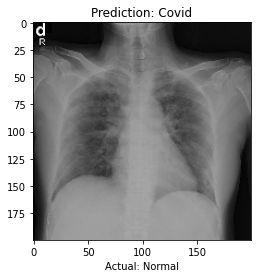

In [30]:
print("started!")


import tensorflow as tf
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
import numpy as np 
import pandas as pd 
import os
from keras.models import load_model
from keras.utils import to_categorical


normal_data = os.listdir(r"C:/deeplearning/New folder/Normal/")

covid_data = os.listdir(r"C:/deeplearning/New folder/Covid/")


class_names = ["Normal", "Covid"]

data = []
labels = []

img_size = 200

for img in normal_data:
    try:
        img_read = plt.imread(r'C:/deeplearning/New folder/Normal' + "/" + img)
        img_resize = cv2.resize(img_read, (img_size, img_size))
        img_array = img_to_array(img_resize)
        
        if img_array.shape == (img_size, img_size, 3):
            data.append(img_array)
            labels.append(0)
            
    except:
        None
        
for img in covid_data:
    try:
        img_read = plt.imread(r'C:/deeplearning/New folder/Covid' + "/" + img)
        img_resize = cv2.resize(img_read, (img_size, img_size))
        img_array = img_to_array(img_resize)
        
        if img_array.shape == (img_size, img_size, 3):
            data.append(img_array)
            labels.append(1)
            
    except:
        None



image_data = np.array(data).reshape(-1, img_size, img_size, 3) / 255.0
labels = np.array(labels)



index = np.arange(image_data.shape[0])
np.random.shuffle(index)
image_data = image_data[index]
labels = labels[index]



from sklearn.model_selection import train_test_split
training_images, testing_images, training_labels, testing_labels, = train_test_split(image_data, labels, test_size = 0.30)

print(training_images.shape)
print(testing_images.shape)
print(training_labels.shape)
print(testing_labels.shape)




model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3, 3), activation = "relu", input_shape = (img_size, img_size, 3), padding = "same"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (img_size, img_size, 3), padding = "same"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu", input_shape = (img_size, img_size, 3), padding = "same"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu", input_shape = (img_size, img_size, 3), padding = "same"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(2, activation = "softmax")
  
])



model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(training_images, training_labels, epochs = 20, validation_data = (testing_images, testing_labels))

model.save("covid_model.tf")




model = load_model("covid_model.tf")



pred = model.predict(testing_images)

for image in range(28): 
    plt.imshow(tf.squeeze(testing_images[image]))
    plt.xlabel("Actual: " + class_names[testing_labels[image]])
    plt.title("Prediction: " + class_names[np.argmax(pred[image])])
    plt.show()